In [1]:
import matplotlib.pyplot as plt
import tmetrics
import numpy as np
import pandas as pd
import theano
import theano.tensor as T
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

ERROR (theano.sandbox.cuda): nvcc compiler not found on $PATH. Check your nvcc installation and try again.
ERROR:theano.sandbox.cuda:nvcc compiler not found on $PATH. Check your nvcc installation and try again.


In [2]:
def plot_loss_function(fn, title='', **kwargs):
    yt = T.ivector('y_true')
    yp = T.fvector('y_predicted')
    true = np.ones((1000,)).astype('int32')
    false = np.zeros((1000,)).astype('int32')
    predicted = np.linspace(1e-6, 1-1e-6, 1000).astype('float32')
    out = fn(yt, yp, **kwargs)
    f = theano.function([yt, yp], out)
    true_losses = f(true, predicted)
    false_losses = f(false, predicted)
    plt.figure(figsize=(12, 8))
    plt.plot(predicted, true_losses, label='ground truth == 1')
    plt.plot(predicted, false_losses, label='ground truth == 0')
    plt.legend(loc='best')
    plt.xlabel('predicted probability')
    plt.ylabel('loss')
    plt.title(title)
    plt.xlim(-.05, abs(predicted.max() * 1.05))
    max_loss = max(true_losses.max(), false_losses.max())
    plt.ylim(max_loss - (max_loss * 1.05), max_loss * 1.05)
    plt.grid(True)

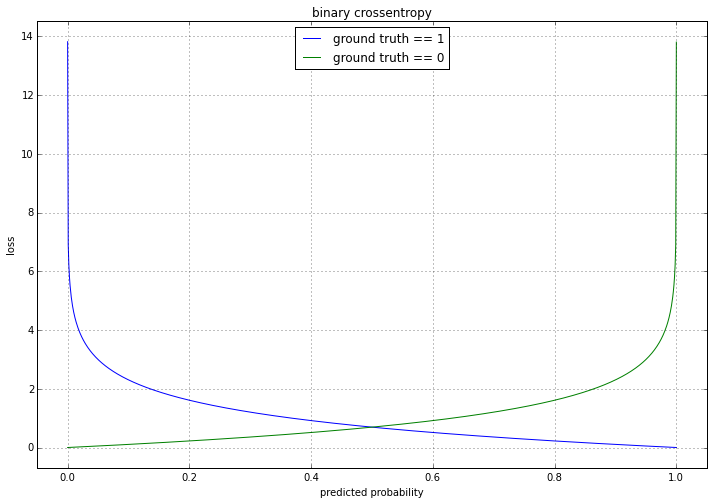

In [4]:
plot_loss_function(tmetrics.classification.binary_crossentropy, 'binary crossentropy')

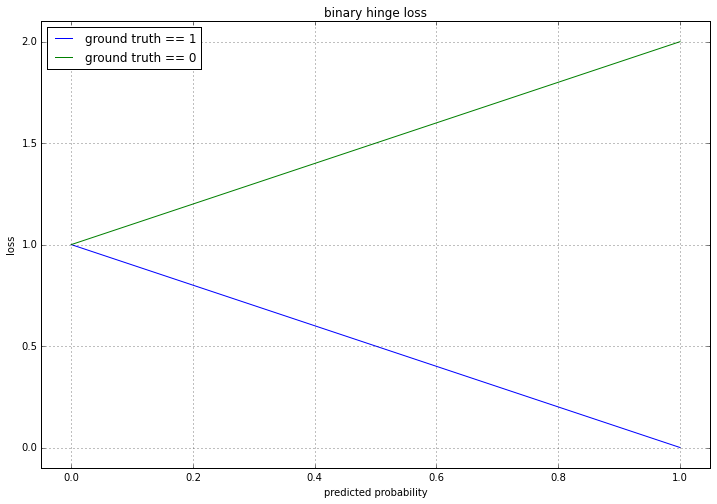

In [5]:
plot_loss_function(tmetrics.classification.binary_hinge_loss, 'binary hinge loss', **{'delta': 1})

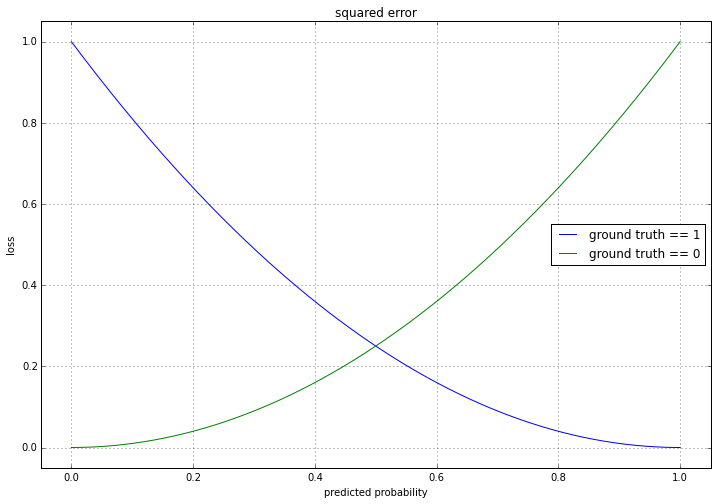

In [3]:
plot_loss_function(tmetrics.classification.squared_error, 'squared error')

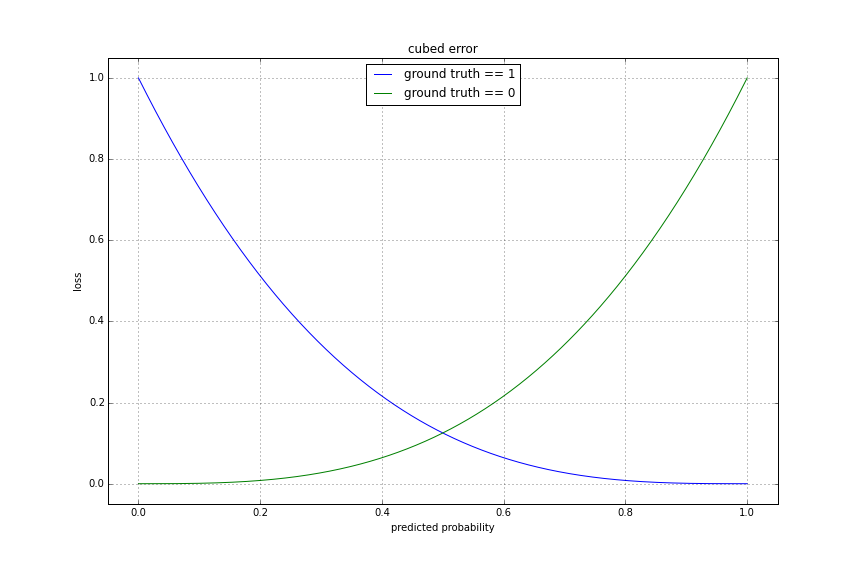

In [85]:
plot_loss_function(cubed_error, 'cubed error')

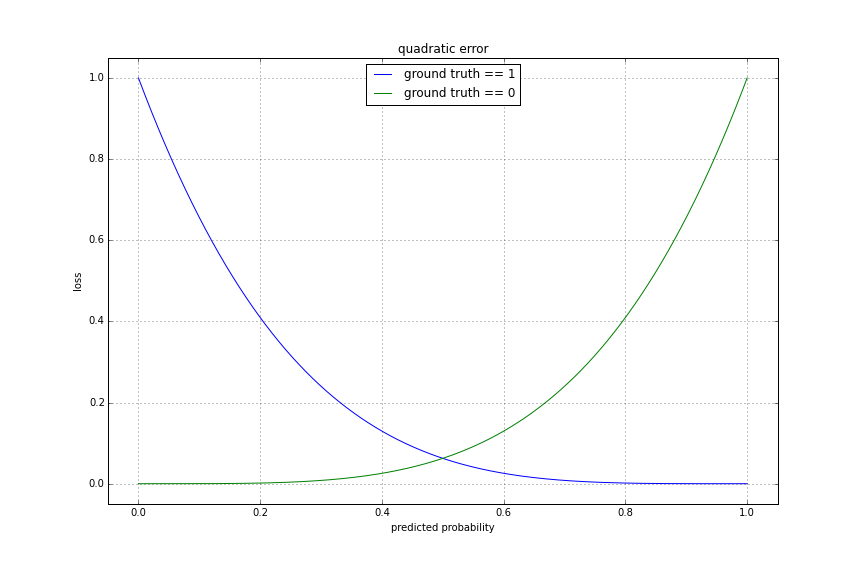

In [87]:
plot_loss_function(quadratic_error, 'quadratic error')

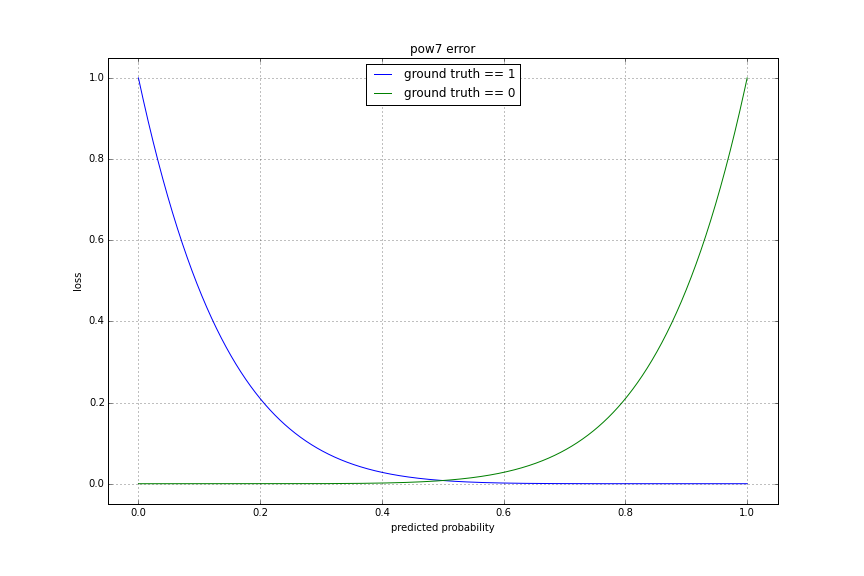

In [91]:
plot_loss_function(pow7_error, 'pow7 error')

In [86]:
quadratic_error = lambda n, m: abs(n-m) ** 4

In [90]:
pow7_error = lambda n, m: abs(n-m) ** 7

array([ 0.0001 ,  0.25005,  0.5    ,  0.74995,  0.9999 ])

In [81]:
n = T.ivector('n')
m = T.ivector('m')
cubed_error = (n-m) ** 3

In [84]:
cubed_error = lambda n, m: abs(n-m) ** 3

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [66]:
np.random.

In [87]:
from scipy.spatial.distance import hamming

In [88]:
b.shape

(430,)

In [97]:
b = np.concatenate([b.reshape(1, b.shape[0]) for _ in xrange(10)])
b.shape

ValueError: total size of new array must be unchanged

In [93]:
hamming?

In [103]:
hamming(b, p)

ValueError: Input vector should be 1-D.

In [109]:
b = np.random.binomial(n=1, p=.5, size=430)
p = np.concatenate([np.random.binomial(n=1, p=abs(b-x), size=(1, b.shape[0])) for x in np.linspace(.001, .999, 1000)], axis=0)
b = np.concatenate([b.reshape(1, b.shape[0]) for _ in xrange(1000)])
p.shape, b.shape

((1000, 430), (1000, 430))

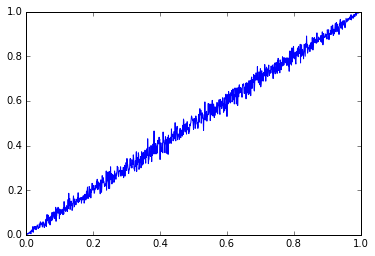

In [112]:
plt.plot(np.linspace(.001, .999, 1000),(b != p).mean(axis=-1))

In [122]:
jaccard = ((b != p) & ((p != 0) | (b != 0))).sum(axis=1) / np.double(((p != 0) | (b != 0)).sum(axis=1))

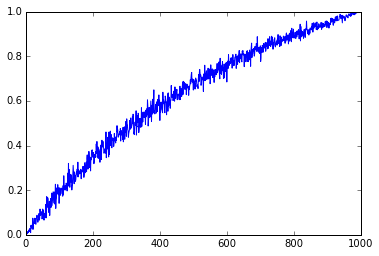

In [123]:
plt.plot(jaccard)

In [127]:
def jaccard(b, p):
    return ((b != p) & ((p != 0) | (b != 0))).sum(axis=-1) / np.double(((p != 0) | (b != 0)).sum(axis=-1))

In [128]:
jaccard(b[0], p[0])

0.004830917874396135

In [132]:
np.asarray([([1] * x) + ([0] * (1000-x)) for x in range(1000)])

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 0]])

In [66]:
def plot_loss_function_2D(fn, title='', **kwargs):
    #for examples that need a matrix of 0/1 predictions
    n = 1000
    yt = T.fmatrix('y_true')
    yp = T.fmatrix('y_predicted')
    out = fn(yt, yp, **kwargs)
    f = theano.function([yt, yp], out, allow_input_downcast=True)
    true = np.asarray([np.random.binomial(n=1, p=x, size=n) for x in np.linspace(1e-6, 1-1e-6, n)])
    false = np.asarray([np.random.binomial(n=1, p=x, size=n) for x in np.linspace(1-1e-6, 1e-6, n)])
    
    predicted = np.asarray([np.random.binomial(n=1, p=x, size=n) for x in np.linspace(1e-6, 1-1e-6, n)])
    #true = np.ones((n,n)).astype('float32')
    #false = np.zeros((n, n)).astype('float32')
    #predicted = np.asarray([([0] * x) + ([1] * (n-x)) for x in range(n)])
    
    
    #import pdb; pdb.set_trace()
    true_losses = f(true, predicted)
    false_losses = f(false, predicted)
    plt.figure(figsize=(12, 8))
    plt.scatter(predicted.mean(axis=1), true_losses, alpha=.2)
    plt.scatter(predicted.mean(axis=1), false_losses, alpha=.2)
    #plt.plot([1-x/float(n) for x in range(n)], false_losses, label='ground truth == 0')
    #plt.legend(loc='best')
    plt.xlabel('(predictions == 1).mean(axis=1)')
    plt.ylabel('loss')
    plt.title(title)
    plt.xlim(-.05, abs(predicted.max() * 1.05))
    #max_loss = true_losses.max()
    #plt.ylim(max_loss - (max_loss * 1.05), max_loss * 1.05)
    plt.grid(True)

In [77]:
def plot_loss_function_2D(fn, title='', **kwargs):
    #for examples that need a matrix of 0/1 predictions
    n = 10000
    yt = T.fmatrix('y_true')
    yp = T.fmatrix('y_predicted')
    out = fn(yt, yp, **kwargs)
    f = theano.function([yt, yp], out, allow_input_downcast=True)
    true = np.asarray([np.random.binomial(n=1, p=.99, size=n) for x in np.linspace(1e-6, 1-1e-6, n)])
    #true = np.ones((n, n))
    #np.zeros((n, n))
    false = np.asarray([np.random.binomial(n=1, p=.01, size=n) for x in np.linspace(1-1e-6, 1e-6, n)])
    
    predicted = np.asarray([np.random.binomial(n=1, p=x, size=n) for x in np.linspace(1e-6, 1-1e-6, n)])
    #true = np.ones((n,n)).astype('float32')
    #false = np.zeros((n, n)).astype('float32')
    #predicted = np.asarray([([0] * x) + ([1] * (n-x)) for x in range(n)])
    
    
    #import pdb; pdb.set_trace()
    true_losses = f(true, predicted)
    false_losses = f(false, predicted)
    plt.figure(figsize=(12, 8))
    plt.scatter(predicted.mean(axis=1), true_losses, alpha=.2)
    plt.scatter(predicted.mean(axis=1), false_losses, alpha=.2)
    #plt.plot([1-x/float(n) for x in range(n)], false_losses, label='ground truth == 0')
    #plt.legend(loc='best')
    plt.xlabel('(predictions == 1).mean(axis=1)')
    plt.ylabel('loss')
    plt.title(title)
    plt.xlim(-.05, abs(predicted.max() * 1.05))
    #max_loss = true_losses.max()
    #plt.ylim(max_loss - (max_loss * 1.05), max_loss * 1.05)
    plt.grid(True)

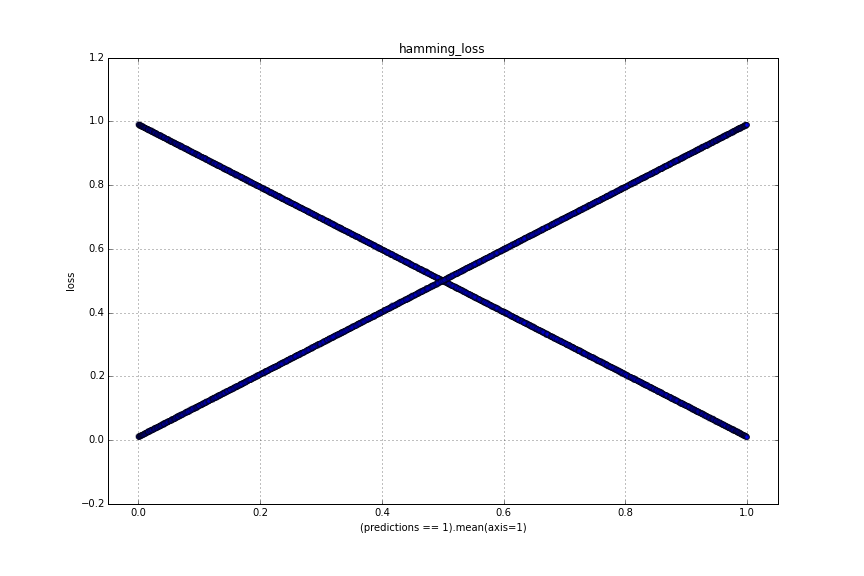

In [78]:
plot_loss_function_2D(tmetrics.classification.hamming_loss, 'hamming_loss')

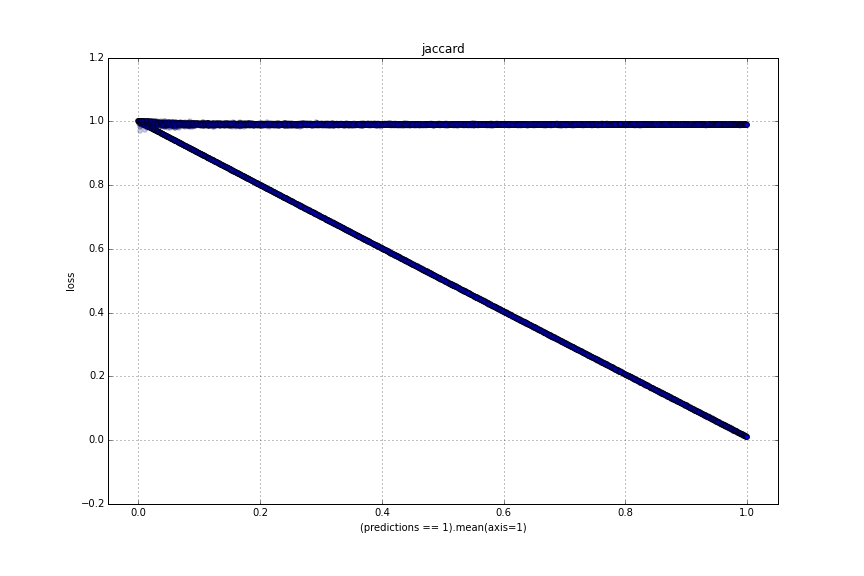

In [79]:
plot_loss_function_2D(tmetrics.classification.jaccard_similarity, 'jaccard')

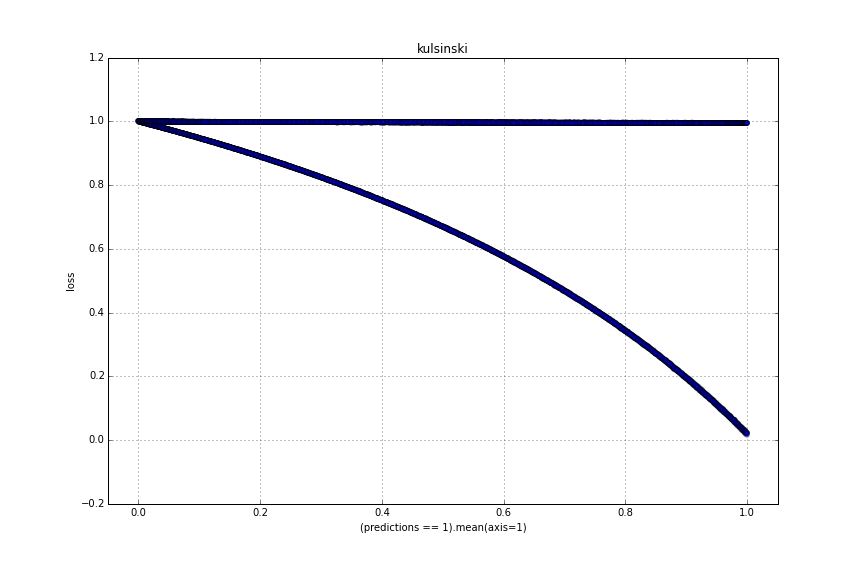

In [80]:
plot_loss_function_2D(tmetrics.classification.kulsinski_similarity, 'kulsinski')

In [1]:
from scipy.spatial.distance import jaccard, kulsinski
n=1000
true = np.ones((n,n)).astype('float32')
false = np.zeros((n, n)).astype('float32')
predicted = np.asarray([([0] * x) + ([1] * (n-x)) for x in range(n)])
plt.plot([kulsinski(true[i].astype(np.double), np.random.binomial(n=1, p=p, size=n).astype(np.double)) for i, p in enumerate(np.linspace(.00001, .99999, n))])

NameError: name 'np' is not defined

In [ ]:
jaccard(np.random.random(10), np.random.binomial(n=1, p=.5, size=10))

In [5]:
def plot_python_probabalistic_loss(fn, title='', **kwargs):
    #for examples that need a matrix of 0/1 predictions
    n = 1000
    y = np.random.binomial(n=1, p=.5, size=n)
    plt.figure(figsize=(12, 8))
    diffs = []
    losses = []
    for diff in np.linspace(1e-6, 1-1e-6, n):
        p = abs(y-diff)
        loss = fn(y, p, **kwargs)
        diffs.append(diff)
        losses.append(loss)
        
    
    plt.plot(diffs, losses)
    #plt.plot([1-x/float(n) for x in range(n)], false_losses, label='ground truth == 0')
    #plt.legend(loc='best')
    plt.xlabel('x for abs(y_true-x)')
    plt.ylabel('loss')
    plt.title(title)
    #plt.xlim(-.05, abs(predicted.max() * 1.05))
    #max_loss = true_losses.max()
    #plt.ylim(max_loss - (max_loss * 1.05), max_loss * 1.05)
    plt.grid(True)

In [3]:
from scipy.spatial.distance import *

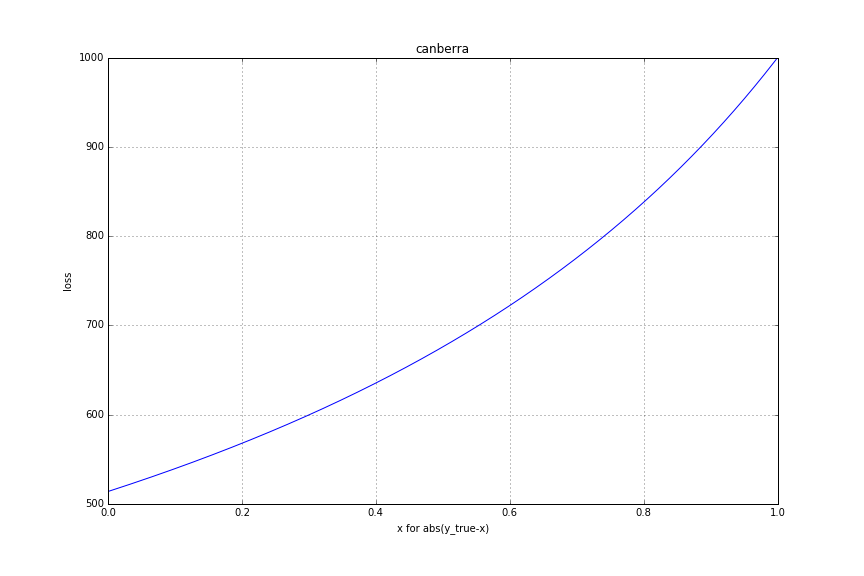

In [8]:
plot_python_probabalistic_loss(canberra, 'canberra')

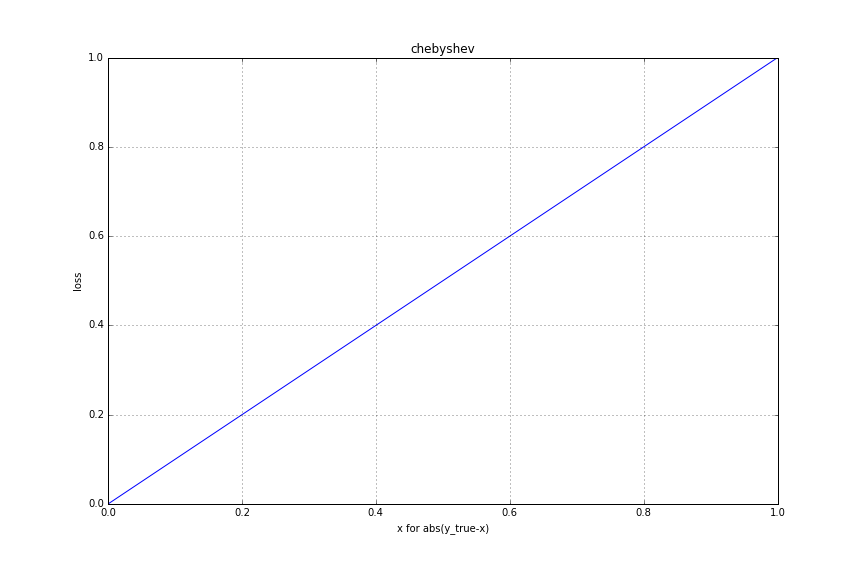

In [10]:
plot_python_probabalistic_loss(chebyshev, 'chebyshev')

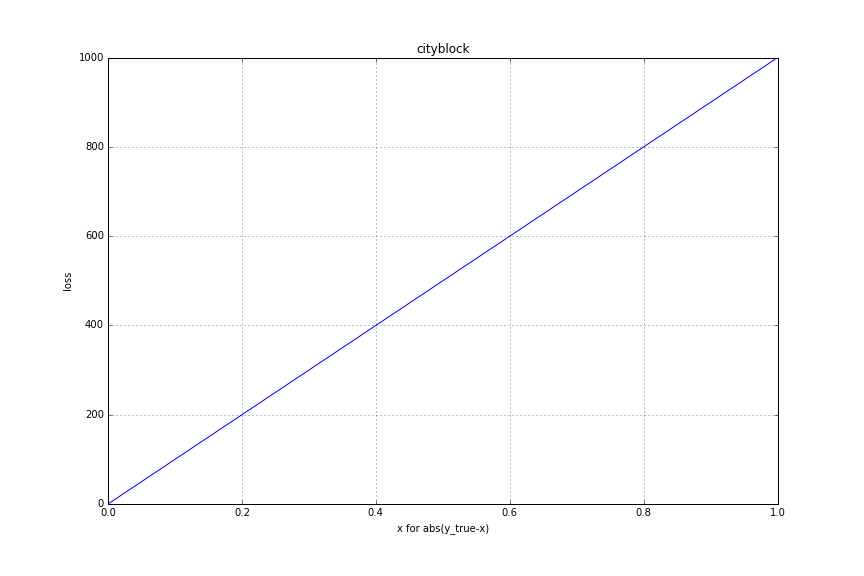

In [11]:
plot_python_probabalistic_loss(cityblock, 'cityblock')

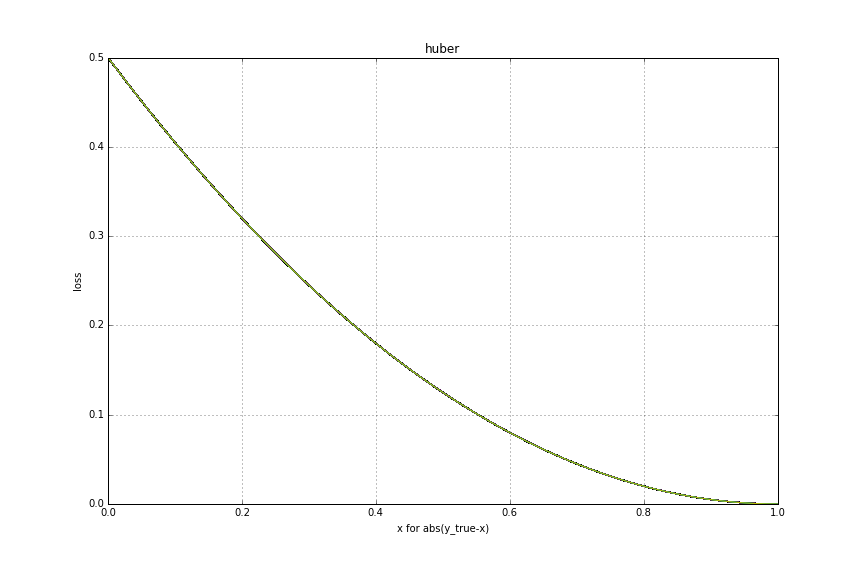

In [20]:
plot_python_probabalistic_loss(huber, 'huber')

In [17]:
from scipy.special import *
huber

<ufunc 'huber'>